# A Safe Haven For Your Movie Streaming Needs: Netflix TV Shows and Movies Dataset Analysis

![Netflix](https://torranceca.files.wordpress.com/2019/10/netflix.jpg)

### **Introduction**

Starting from March of 2020, the world began its lockdown as a defense againse the global pandemic: Covid-19. People are forced to stay at home, whether they are working adults or elementary school students. At the beginning of this lockdown, parents are finding ways to interact and have fun with their children while students and young adults find different ways to pass the time. But as time goes on and the different activities seize to be cool and fun, the people start to turn to the one thing that never seizes to amaze: Netflix. 

But how does Netflix keep up with the high demands for movies and TV shows? And how did Netflix become one of the top streaming sites? Well, we can start answering those questions by exploring the types and number of movies and TV shows that Netflix has added throughout the years starting from 2007 to 2019, using some of the most important data science techniques we have learned from class.

### **Background**
The dataset to be used contains more than 6000 different TV shows and movies in of which can be found here: https://www.kaggle.com/shivamb/netflix-shows?fbclid=IwAR0v6IiNRcCQLV-CFhNqloOAJI0wZU8q3CXmj2rO1u1zIg_5kfEfjRKxMMQ

We will be focusing our analysis around date_added, type, and country.

### **Our Problem**
Using data science techniques in the entertainment industry can be very beneficial to analyze trends and see what works well with users. By using exploratory analysis and data visualizations, hypothesis testing, and machine learning, we are trying to answer the question of how productive Netflix is as a company, and what dates and countries have been the most popular.

### **Data Collection**
First, you'll need to obtain the spreadsheet of the dataset listed above. This can be done by going to the site, downloading the csv file, and extracting the file in the same folder with your python project file. Since this dataset is a comma-separated values (csv) file, the pandas' read_csv function can be used to read the file. So begin by importing pandas and any other necessary libraries that you will be needing later on. We imported the libraries we utilized for this project down below.

In [84]:
import numpy as np
import warnings
import pandas as pd
from IPython.display import Image
from scipy.stats import norm
from math import sqrt
import statsmodels.formula.api as sm
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# read data into data frame
data = pd.read_csv('netflix_titles.csv')
data.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


### **Data Processing**
Now that we have our data, we can now process the dataframe into something that would be most useful for our objective. For our analysis, we will be dropping the director and cast columns as well as replacing any nil values with 0 and converting the date_added column into something that is more parsable like datetime.

In [85]:
# drop director and actors columns as they are no useful in analysis and any date_added values are NaN
data = data.drop(['director', 'cast'], axis=1)
data = data[data['date_added'].notnull()]

#convert date_added to datetime object
data['date_added'] = pd.to_datetime(data['date_added'])
data['added_year'] = data.apply(lambda row: row.date_added.year, axis = 1)

#drop any data in 2020
data = data[data.added_year < 2020]

# replace na values with 0
data['country'].fillna(0, inplace=True)
data['date_added'].fillna(0, inplace=True)
data['release_year'].fillna(0, inplace=True)

data.head(10)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,added_year
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016
2,70234439,TV Show,Transformers Prime,United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018
3,80058654,TV Show,Transformers: Robots in Disguise,United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018
4,80125979,Movie,#realityhigh,United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017
5,80163890,TV Show,Apaches,Spain,2017-09-08,2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,2017
6,70304989,Movie,Automata,"Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",2017
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,Chile,2017-09-08,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,2017
8,80117902,TV Show,Fire Chasers,United States,2017-09-08,2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",2017
9,70304990,Movie,Good People,"United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,2017


And we can see how many movies and how many tv shows are in this dataframe

In [86]:
data.groupby("type").size()

type
Movie      4117
TV Show    1922
dtype: int64

### **Exploratory Analysis and Data Visualization**


Let's first find which country released the most content onto Netflix.

Some of the movies and TV shows are produced by multiple countries, so first we must separate those entries so that we can calculate the totals for each country individually.

In [0]:
#splits country column by the "," that separates the countries if there are more than one
countries = data['country'].str.split(',', expand = True)
keys = [c for c in countries]
#puts all the countries in one column
countries = pd.melt(countries, value_vars=keys, value_name='country')

Now we will group by the countries, and count how many of each there are.

In [88]:
countries = countries.groupby('country')
countries = countries.count().reset_index()
countries = countries.rename(columns={'variable' : 'count'})
countries

,country,count
0,,3
1,Afghanistan,1
2,Albania,1
3,Argentina,12
4,Armenia,1
...,...,...
167,United States,2184
168,Uruguay,4
169,Venezuela,2
170,Vietnam,4




That's a lot of countries! Now to find the country with the highest number of countributions to Netflix, we find the maximum count:

In [89]:
countries.loc[countries['count'].idxmax()]

country    United States
count               2184
Name: 167, dtype: object

This shows that the US has the highest number of contributions to Netflix, with a total of 2184 shows and movies. 

Now we will do something similar with years, to see in which year Netflix added the most shows.
First, we filter the data so that we have the titles and the dates the titles were added to Netflix. We then change the datetime attributes to years, because that's the only time element we need in order to sort by year. 

In [0]:
year = data.filter(['title','added_year'], axis=1)

Then, we group by the years, and count how many additions there were to Netflix each year. Then we calculate the maximum, just like last time.

In [91]:
year = year.groupby('added_year')
year = year.count().reset_index()
year = year.rename(columns={'title' : 'count'})
year.loc[year['count'].idxmax()]

added_year    2019
count         2349
Name: 11, dtype: int64

We can even graph the number of additions Netflix made, with the 'year' dataframe we created.

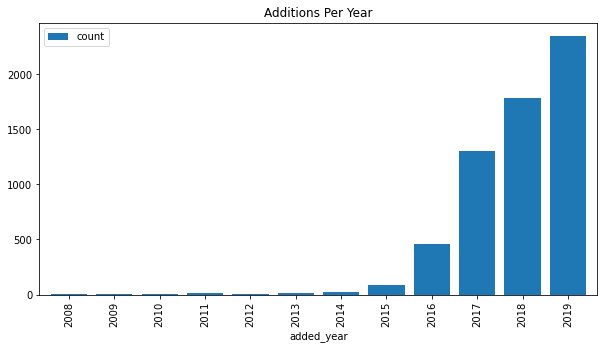

In [92]:
ax = year.plot.bar(x='added_year', y='count', rot=0, title = 'Additions Per Year', width = 0.8, figsize = (10,5))
ax = plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')

Now we can visually see that Netflix added the most shows and movies in 2019! 

What if we want to see how many TV shows and movies Netflix added, separately? We can create another dataframe to count that data, and then graph that with a stacked bar graph.

Here we create a dataframe with the same data as in the last dataframe, but this time we group by year AND type. 

In [93]:
showvsmovie = data.filter(['title', 'added_year', 'type'], axis=1)
showvsmovie = showvsmovie.groupby(['added_year', 'type'])
showvsmovie = showvsmovie.count().reset_index()
showvsmovie = showvsmovie.rename(columns={'title' : 'count'})
showvsmovie

,added_year,type,count
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,4
6,2012,TV Show,3
7,2013,Movie,6
8,2013,TV Show,6
9,2014,Movie,19


Great! Now we are going to use the method "pivot", which will turn this dataframe into a tidy dataset and combine the rows so that each row represents a single year. 

In [94]:
showvsmovie = showvsmovie.pivot(index='added_year', columns='type')['count']
showvsmovie

type,Movie,TV Show
added_year,,
2008,1.0,1.0
2009,2.0,NaN
2010,1.0,NaN
2011,13.0,NaN
2012,4.0,3.0
2013,6.0,6.0
2014,19.0,6.0
2015,58.0,32.0
2016,264.0,192.0


Perfect! Now, let's graph. 

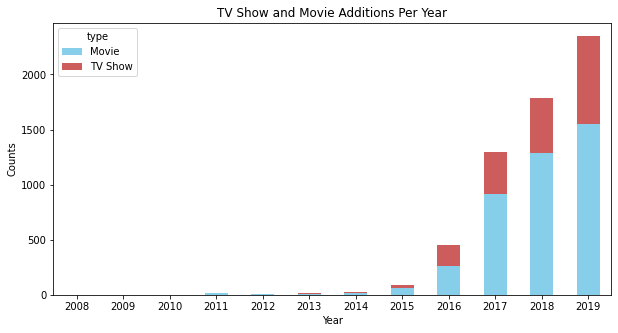

In [95]:
ax = showvsmovie.plot.bar(color=["SkyBlue","IndianRed"], stacked = True, rot=0, title="TV Show and Movie Additions Per Year",figsize = (10,5)
)
ax.set_xlabel("Year")
ax.set_ylabel("Counts");

Cool! Now let's compare the time difference for when a show comes out and gets added to Netflix and for when a movie comes out and gets added to Netflix.

First let's prepare the data by adding a row for time difference (time_diff) by subtracting the released year from the added year and then preparing a new dataframe for just the type and time difference.

In [96]:
data['time_diff'] = data.apply(lambda row: row.added_year - row.release_year, axis = 1)
data.head(10)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,added_year,time_diff
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,0
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,0
2,70234439,TV Show,Transformers Prime,United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018,5
3,80058654,TV Show,Transformers: Robots in Disguise,United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,2
4,80125979,Movie,#realityhigh,United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017,0
5,80163890,TV Show,Apaches,Spain,2017-09-08,2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,2017,1
6,70304989,Movie,Automata,"Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",2017,3
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,Chile,2017-09-08,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,2017,0
8,80117902,TV Show,Fire Chasers,United States,2017-09-08,2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",2017,0
9,70304990,Movie,Good People,"United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,2017,3


Great! Now let's filter and prepare the needed data for plotting.

In [97]:
diff_times = data.filter(['title', 'time_diff', 'type'], axis=1)
diff_times = diff_times.groupby(['time_diff', 'type'])
diff_times = diff_times.count().reset_index()
diff_times = diff_times.rename(columns={'title' : 'count'})
diff_times = diff_times.pivot(index='time_diff', columns='type')['count']
diff_times

type,Movie,TV Show
time_diff,,
-3,NaN,1.0
-2,NaN,1.0
-1,2.0,5.0
0,1212.0,910.0
1,914.0,353.0
...,...,...
72,4.0,NaN
73,3.0,NaN
74,3.0,NaN


Now let's plot!

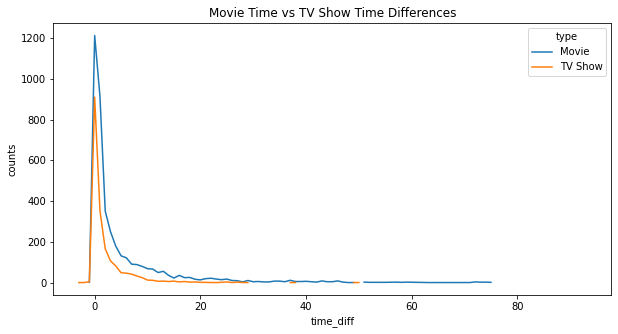

In [98]:
plot_diff = diff_times.plot(figsize=(10,5))
plot_diff.set_ylabel('counts')
plot_diff.set_title('Movie Time vs TV Show Time Differences');

It looks like most of the TV shows and movies were added shortly after they were made, but there were some movies with substantial differences between the date of their release and the date of their addition to Netflix.

Going back to looking at movies and TV shows added per year, let's look at the same data but this time a bit more specifically by looking at ratings of these movies and TV shows. 

So lets first separate the movies from the TV shows.

In [0]:
#separated Movie and TV Show
grouped_data = data.groupby('type')
movies = grouped_data.get_group('Movie')
tv = grouped_data.get_group('TV Show')

And now group by the ratings and the years of which the movies are added to Netflix.

In [100]:
#group movies by year_added and rating
grouped_m = movies.groupby(["added_year","rating"]).size() #gets the row counts
grouped_m = grouped_m.reset_index(name='counts') #convert to dataframe to be used later
grouped_m = grouped_m.pivot(index ='added_year', columns ='rating') 
grouped_m.head(10)

counts                          ...                                 
rating          G NC-17    NR    PG PG-13  ...  TV-PG  TV-Y TV-Y7 TV-Y7-FV   UR
added_year                                 ...                                 
2008          NaN   NaN   1.0   NaN   NaN  ...    NaN   NaN   NaN      NaN  NaN
2009          NaN   NaN   1.0   NaN   NaN  ...    NaN   NaN   NaN      NaN  NaN
2010          NaN   NaN   1.0   NaN   NaN  ...    NaN   NaN   NaN      NaN  NaN
2011          NaN   NaN   9.0   NaN   NaN  ...    4.0   NaN   NaN      NaN  NaN
2012          NaN   NaN   NaN   1.0   NaN  ...    1.0   NaN   NaN      NaN  NaN
2013          NaN   NaN   4.0   1.0   NaN  ...    NaN   NaN   NaN      NaN  NaN
2014          1.0   NaN   5.0   3.0   NaN  ...    2.0   1.0   1.0      NaN  NaN
2015          1.0   NaN  19.0   2.0   2.0  ...    2.0   2.0   1.0      1.0  NaN
2016          2.0   1.0  62.0   4.0   6.0  ...   26.0   NaN  10.0      8.0  1.0
2017          4.0   NaN  56.0  22.0  27.0  ...  114.0  14.0  17.0      5.0  2.0

[10 rows x 14 columns]

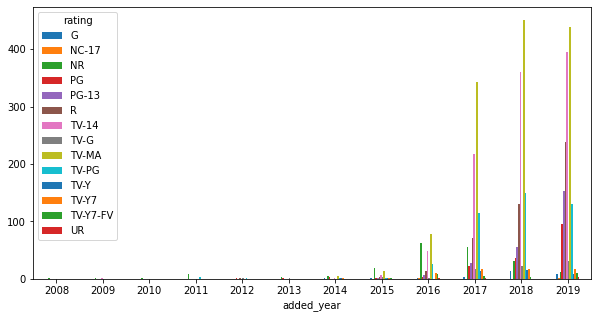

In [101]:
movie_plot = grouped_m.plot.bar(y = 'counts', rot = 0, figsize=(10,5))

From this graph it can be seen that TV-MA was the most common rating in 2016, 2017, 2018, and 2019. TV-14 was the second most common in 2017, 2018, and 2019, while NR was the second most common in 2016, and the most common in 2015.

The same thing is done for TV Shows:

In [102]:
#group tv shows by year_added and rating
grouped_t = tv.groupby(["rating", "added_year"]).size() #gets the row counts
grouped_t = grouped_t.reset_index(name='counts') #convert to dataframe to be used later
grouped_t = grouped_t.pivot(index ='added_year', columns ='rating') 
grouped_t.head(10)

counts                                                              
rating          G   NR   PG    R  TV-14  TV-G  TV-MA TV-PG  TV-Y TV-Y7 TV-Y7-FV
added_year                                                                     
2008          NaN  NaN  NaN  NaN    NaN   NaN    1.0   NaN   NaN   NaN      NaN
2012          NaN  NaN  NaN  NaN    NaN   NaN    NaN   3.0   NaN   NaN      NaN
2013          NaN  1.0  NaN  NaN    2.0   NaN    2.0   1.0   NaN   NaN      NaN
2014          NaN  NaN  NaN  NaN    NaN   NaN    3.0   1.0   1.0   1.0      NaN
2015          NaN  NaN  NaN  NaN    5.0   6.0    6.0   7.0   2.0   4.0      2.0
2016          NaN  NaN  NaN  1.0   85.0   7.0   31.0  24.0  10.0   8.0     25.0
2017          NaN  6.0  NaN  NaN  154.0  11.0   91.0  78.0  23.0  20.0      4.0
2018          1.0  5.0  NaN  NaN  138.0  13.0  202.0  63.0  23.0  27.0     19.0
2019          NaN  3.0  1.0  1.0  260.0  31.0  326.0  88.0  39.0  37.0     17.0

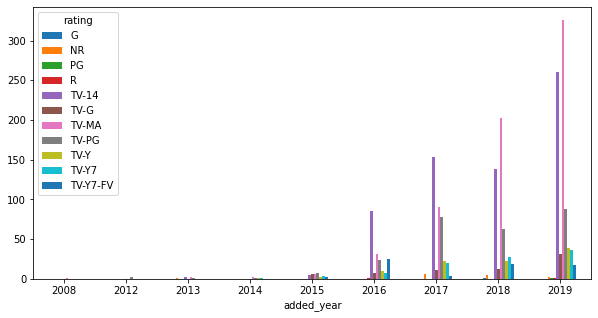

In [103]:
tv_plot = grouped_t.plot.bar(y = 'counts', rot= 0, figsize=(10,5))

TV-MA was also the most common rating for TV shows in 2018 and 2019. The second most common was TV-14 in 2018 and 2019, just like it was for movies. TV-14 was the most common in 2016 and 2017.

### **Hypothesis Testing**

The hypothesis we are going to test is if the number of movies produced in 2017 and 2019 stayed the same for the rating of TV-MA. This will be our null hypothesis. So we are testing that pB − pA ≤ 0 where pB is TV_MA movies produced in 2017 and pA is TV-MA movies produced in 2019.

As can be seen in the above graphs, the quantity of movies in each rating category appeared to increase over time. To confirm that these increases were statistically significant, we chose to compare the quantity of a specific movie rating between years. We selected movies rated TV-MA because this was the most popular rating for movies added to Netflix in both 2017 and 2019, as can be seen in the graph above. 

We will start off by iterating the rows of our dataframe to get our numbers. We will need the total number of movies sampled in 2017 and 2019 (represented by total_movies17 and total_movies19 respectively), and then how many of those movies were TV-MA (represented by movies17 and movies19). We will use these numbers to calculate pB and pA as shown below.

In [0]:
alpha = 0.05

total_movies17 = 0
total_movies19 = 0
movies17 = 0
movies19 = 0

for _, row in data.iterrows():
    typ = row["type"]
    added_year = row["added_year"]
    rating = row["rating"]
    
    if(typ == "Movie"):
        if(added_year == 2017):
            total_movies17 += 1
            if(rating == "TV-MA"):
                movies17 += 1
        if(added_year == 2019):
            total_movies19 += 1
            if(rating == "TV-MA"):
                movies19 += 1

Here are our estimate values for TV-MA movies produced in 2017 and 2019:

In [0]:
pB = movies17/(total_movies17)
pA = movies19/(total_movies19)

Now we need to calculate our estimate value and variance through statistics:

In [106]:
total = total_movies17 + total_movies19

p = ((pB)*(total_movies17/total))+((pA)*(total_movies19/total)) 

varY = p * (1-p) * ((1/total_movies17)+(1/total_movies19))

yHat = pB - pA

prob = 1- norm.cdf(x=yHat, loc=0, scale = sqrt(varY))

prob

1.1855564705509636e-06

From our analysis, we can reject our null hypothesis because P(Y > yHat) = 1.1855564705509636e-06 which is less than our alpha value of .05. This means we can confidently say that the total movies with the rating TV-MA from 2017 to 2019 did not stay the same.




So now that we confirmed that there is indeed a change in production of TV-MA movies between the years, let's see if the overall total of movies added to Netflix increases or decreases as time goes on.


### **Linear Regressions**


Linear regression is utilized to complete predictive analysis. Through linear regression, we can model the relationships between predictor variables and the magnitude of their relationships by mapping them to a linear format. 

In order to determine if there is an overall increase in total movies and TV shows, we must look more specifically at just the added_years and count. Here, we make a linear regression line to show data such as R-Sqared, Intercepts, p-values, etc. We chose to evaluate the data from 2014 onwards, because that appears to be when Netflix started developing popularity.

In [107]:
# Use year data frame from before

# stats
year = year[year.added_year >2013]
simple_res = sm.ols('count~added_year', data=year).fit();
simple_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     87.48
Date:                Mon, 18 May 2020   Prob (F-statistic):           0.000728
Time:                        15:02:43   Log-Likelihood:                -39.771
No. Observations:                   6   AIC:                             83.54
Df Residuals:                       4   BIC:                             83.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.01e+06   1.08e+05     -9.344      0.001   -1.31e+06    -7.1e+05
added_year   501.1429     53.581      9.353      0.001     352.379     649.907
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.646
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.240
Skew:                          -0.189   Prob(JB):                        0.887
Kurtosis:                       2.095   Cond. No.                     2.38e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
simple_res.params

Intercept    -1.009554e+06
added_year    5.011429e+02
dtype: float64

Since the pvalue is small we can reject the null hypothsis that there is no relationsip between the number of movies produced and the year. It is safe to assume that as years increase, number of movies produced increases as well. On average, Netflix produces 186.73 more movies every year.

Now let's plot this data and map a linear regression for a visual representation of this analysis.

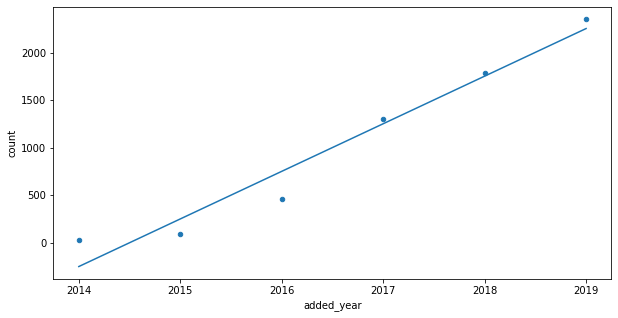

In [109]:
# linear regression plot line
year.plot.scatter(x = 'added_year', y = 'count', figsize=(10,5))
x = year['added_year']
y = year['count']
m,b = np.polyfit(x,y,1)
plt.plot(x, m*x+b, '-');


And the predicted number of movies/tv shows to be added by the end of 2020 is....



In [110]:
m*2020+b

2754.3333333332557

Now let's see if there is a relationship between number of movies/tv shows added, year that they're added, and the rating (This is just like the technique above, just with the whole data and a different type of graph)

In [111]:
r_times = data.filter(['title', 'added_year', 'rating'], axis=1)
r_times = r_times.groupby(['added_year', 'rating'])
r_times = r_times.count().reset_index()
r_times = r_times.rename(columns={'title' : 'count'})
rate_data = r_times.pivot(index='added_year', columns='rating')['count']
rate_data

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
added_year,,,,,,,,,,,,,,
2008,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,4.0,NaN,NaN,NaN,NaN
2013,NaN,NaN,5.0,1.0,NaN,NaN,2.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN
2014,1.0,NaN,5.0,3.0,NaN,NaN,1.0,NaN,8.0,3.0,2.0,2.0,NaN,NaN
2015,1.0,NaN,19.0,2.0,2.0,3.0,11.0,10.0,19.0,9.0,4.0,5.0,3.0,NaN
2016,2.0,1.0,62.0,4.0,6.0,15.0,133.0,9.0,109.0,50.0,10.0,18.0,33.0,1.0


And let's plot!

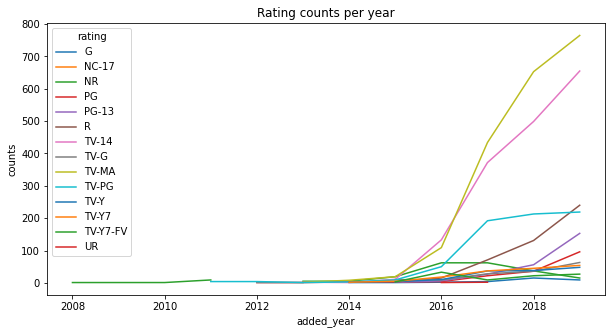

In [112]:
plot_rate = rate_data.plot(figsize=(10,5))
plot_rate.set_ylabel('counts')
plot_rate.set_title('Rating counts per year');

We can see that in every rating type, there seems to be an increase of some sort. But let's confirm that by seeing if a term for an interaction between rating and year should be included.

In [113]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='count ~ rating + added_year', data=r_times).fit();
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     6.010
Date:                Mon, 18 May 2020   Prob (F-statistic):           9.29e-08
Time:                        15:02:44   Log-Likelihood:                -542.52
No. Observations:                  90   AIC:                             1115.
Df Residuals:                      75   BIC:                             1153.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -5.799e+04   9461.029     -6.129      0.000   -7.68e+04   -3.91e+04
rating[T.NC-17]      -33.0915     89.910     -0.368      0.714    -212.201     146.018
rating[T.NR]          96.7469     57.404      1.685      0.096     -17.609     211.102
rating[T.PG]          44.0498     59.574      0.739      0.462     -74.627     162.727
rating[T.PG-13]       29.0876     66.629      0.437      0.664    -103.645     161.820
rating[T.R]           81.0861     63.508      1.277      0.206     -45.429     207.601
rating[T.TV-14]      243.4592     59.738      4.075      0.000     124.455     362.463
rating[T.TV-G]        38.4052     61.291      0.627      0.533     -83.692     160.502
rating[T.TV-MA]      286.6789     59.804      4.794      0.000     167.543     405.815
rating[T.TV-PG]      115.0262     58.383      1.970      0.053      -1.279     231.331
rating[T.TV-Y]        17.8333     63.489      0.281      0.780    -108.643     144.310
rating[T.TV-Y7]       21.5000     63.489      0.339      0.736    -104.977     147.977
rating[T.TV-Y7-FV]    -0.9124     66.629     -0.014      0.989    -133.645     131.820
rating[T.UR]         -26.9651     77.856     -0.346      0.730    -182.062     128.132
added_year            28.7582      4.692      6.130      0.000      19.412      38.105
==============================================================================
Omnibus:                       28.404   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.277
Skew:                           1.064   Prob(JB):                     2.02e-16
Kurtosis:                       6.840   Cond. No.                     1.65e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see the pvalues for almost all the ratings are greater than 0.05. Thus, we cannot reject the null hypothesis that there is no relationship between rating and year added, besides for the rating for TV-14 and TV-MA.

### **Insight**

Overall, from our analysis we can confrim Netflix is a popular online streaming service that is worth your investment during this country wide lockdown. We can see its growth throughout the years and its evergrowing additions of movie/tv shows to its site. Netflix is really trying to keep up the high demands of the general public, and it's this effort that's keeping Netflix at the top of the movies/tv shows streaming sites. 

### **Resources**

This tutorial only covered some of the basics of the different packages and libraries that are available in Python. For more details check out the links below:


Packages:

*   [Pandas](http://pandas.pydata.org/)
*   [Numpy](http://www.numpy.org/)
*   [Matplotlib](https://matplotlib.org/)
*   [Scikit-learn](http://scikit-learn.org/stable/)
*   [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/)

More Examples:

*   [Python Data Science Tutorial](https://www.tutorialspoint.com/python_data_science/python_data_aggregation.htm)
*   [Matplotlib](https://realpython.com/python-matplotlib-guide/)
*   [NumPy](https://www.w3schools.com/python/numpy_intro.asp)